## CENIPA

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lendo o dataset

ocorrencia.csv colunas
codigo_ocorrencia
codigo_ocorrencia1
codigo_ocorrencia2
codigo_ocorrencia3	
ocorrencia_classificacao
ocorrencia_uf
ocorrencia_aerodromo
ocorrencia_dia
ocorrencia_hora


ocorrencia_tipo.csv colunas
codigo_ocorrencia1
ocorrencia_tipo

aeronave.csv 
codigo_ocorrencia2
aeronave_operador_categoria
aeronave_tipo_veiculo

fator_contribuinte.csv
codigo_ocorrencia3
fator_nome
fator_area


In [109]:
# 1-
principal = pd.read_csv("ocorrencia.csv", sep=';', parse_dates=['ocorrencia_dia'],skip_blank_lines=True)
# estas são as tabelas aeronave.csv  fator_contribuinte.csv  ocorrencia.csv  ocorrencia_tipo.csv
ocorrencia_tipo = pd.read_csv("ocorrencia_tipo.csv", sep=';', skip_blank_lines=True)

aeronave = pd.read_csv("aeronave.csv", sep=';', skip_blank_lines=True)

fator_contribuinte = pd.read_csv("fator_contribuinte.csv", sep=';', skip_blank_lines=True)


In [125]:
novoprincipal = principal.merge(ocorrencia_tipo,how='inner',on=['codigo_ocorrencia1'])
nprin = novoprincipal.merge(aeronave, how='inner', on = ['codigo_ocorrencia2'])
zprin = nprin.merge(fator_contribuinte, how='inner', on = ['codigo_ocorrencia3'])

In [126]:
umdf = zprin.loc[:,['codigo_ocorrencia','ocorrencia_classificacao', 'ocorrencia_uf' ,'ocorrencia_aerodromo', 'ocorrencia_dia' ,'ocorrencia_hora','ocorrencia_tipo',
                    'aeronave_operador_categoria','aeronave_tipo_veiculo','fator_nome','fator_area']]

In [128]:
umdf.head()
umdf.to_csv('ocorrencias_abril2010_jun2020.csv')


### Limpeza

In [129]:
ocorrencia = pd.read_csv('ocorrencias_abril2010_jun2020.csv', parse_dates=['ocorrencia_dia'], index_col='Unnamed: 0')

In [137]:
# da linha 1 a 3 localiza os indices 
len(ocorrencia)
ocorrencia.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,ocorrencia_tipo,aeronave_operador_categoria,aeronave_tipo_veiculo,fator_nome,fator_area
0,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,APLICAÇÃO DE COMANDOS,FATOR OPERACIONAL
1,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,JULGAMENTO DE PILOTAGEM,FATOR OPERACIONAL
2,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,PLANEJAMENTO DE VOO,FATOR OPERACIONAL
3,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,PROCESSO DECISÓRIO,FATOR HUMANO
4,39707,INCIDENTE GRAVE,AM,****,2010-09-01,12:30:00,COM TREM DE POUSO,***,AVIÃO,INDISCIPLINA DE VOO,FATOR OPERACIONAL


In [131]:
# Trazer ocorrencias unicas de cidade estado
ocorrencia.loc[:,'ocorrencia_uf'].unique()

array(['MT', 'AM', 'PR', 'SP', 'PA', 'TO', 'SC', 'GO', 'BA', 'DF', 'MG',
       'AC', 'RS', 'RR', 'MS', 'PE', 'RJ', 'AL', 'RO', 'MA', 'PI', 'CE',
       'SE', 'ES', 'RN', 'AP', 'PB', '***'], dtype=object)

#### Verificando se é unico

In [135]:
# ocorrencia.codigo_ocorrencia.is_unique

# ocorrencia.ocorrencia_uf.is_unique

In [138]:
ocorrencia.loc[ocorrencia['codigo_ocorrencia'] == 39527]

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,ocorrencia_tipo,aeronave_operador_categoria,aeronave_tipo_veiculo,fator_nome,fator_area
0,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,APLICAÇÃO DE COMANDOS,FATOR OPERACIONAL
1,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,JULGAMENTO DE PILOTAGEM,FATOR OPERACIONAL
2,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,PLANEJAMENTO DE VOO,FATOR OPERACIONAL
3,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,PROCESSO DECISÓRIO,FATOR HUMANO


#### Alterar os dados de uma coluna

# limpar sujeira abaixo
ocorrencia_uf **
ocorrencia_aerodromo ****
ocorrencia_aerodromo ###!

In [143]:
ocorrencia.loc[ocorrencia.codigo_ocorrencia == '****',['codigo_ocorrencia']]


,codigo_ocorrencia


In [145]:
ocorrencia.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,ocorrencia_tipo,aeronave_operador_categoria,aeronave_tipo_veiculo,fator_nome,fator_area
0,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,APLICAÇÃO DE COMANDOS,FATOR OPERACIONAL
1,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,JULGAMENTO DE PILOTAGEM,FATOR OPERACIONAL
2,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,PLANEJAMENTO DE VOO,FATOR OPERACIONAL
3,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,PROCESSO DECISÓRIO,FATOR HUMANO
4,39707,INCIDENTE GRAVE,AM,****,2010-09-01,12:30:00,COM TREM DE POUSO,***,AVIÃO,INDISCIPLINA DE VOO,FATOR OPERACIONAL


In [147]:
ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 0 to 4814
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   codigo_ocorrencia            4815 non-null   int64         
 1   ocorrencia_classificacao     4815 non-null   object        
 2   ocorrencia_uf                4815 non-null   object        
 3   ocorrencia_aerodromo         4815 non-null   object        
 4   ocorrencia_dia               4815 non-null   datetime64[ns]
 5   ocorrencia_hora              4815 non-null   object        
 6   ocorrencia_tipo              4815 non-null   object        
 7   aeronave_operador_categoria  4815 non-null   object        
 8   aeronave_tipo_veiculo        4815 non-null   object        
 9   fator_nome                   4815 non-null   object        
 10  fator_area                   4815 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [148]:
classificacao_ocorrencia = ocorrencia.copy()

### Total de Incidentes e Acidentes

<AxesSubplot:>

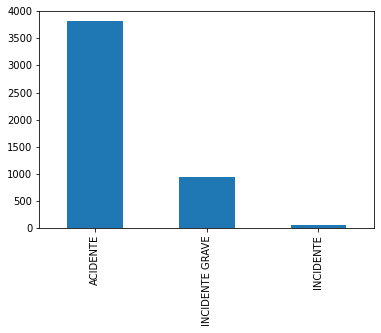

In [149]:

classificacao_ocorrencia['ocorrencia_classificacao'].value_counts().plot.bar()

 ### Qual o estado que contem mais ocorrencia_classificacao

### Ocorrencia por estado
14% acidentes relatados são do estado de são paulo  

In [154]:
group_by_por_estado_numero_incidentes = classificacao_ocorrencia.groupby(['ocorrencia_uf','ocorrencia_classificacao'])['ocorrencia_classificacao'].count()/len(ocorrencia)
# group_by_por_estado_numero_incidentes.mul(100).plot.bar()
group_by_por_estado_numero_incidentes.mul(100)

ocorrencia_uf  ocorrencia_classificacao
***            ACIDENTE                     0.062305
AC             ACIDENTE                     0.332295
               INCIDENTE GRAVE              0.373832
AL             ACIDENTE                     0.560748
               INCIDENTE GRAVE              0.228453
                                             ...    
SE             INCIDENTE GRAVE              0.020768
SP             ACIDENTE                    14.870197
               INCIDENTE GRAVE              2.720665
TO             ACIDENTE                     1.059190
               INCIDENTE GRAVE              0.228453
Name: ocorrencia_classificacao, Length: 65, dtype: float64

### Por estado do maior numero de incidentes para o menor

### Ocorrencia por Estado por tipo de classificação

In [155]:
group_by_por_estado = classificacao_ocorrencia.groupby(['ocorrencia_uf','ocorrencia_classificacao'])['ocorrencia_classificacao'].count()
group_by_por_estado

ocorrencia_uf  ocorrencia_classificacao
***            ACIDENTE                      3
AC             ACIDENTE                     16
               INCIDENTE GRAVE              18
AL             ACIDENTE                     27
               INCIDENTE GRAVE              11
                                          ... 
SE             INCIDENTE GRAVE               1
SP             ACIDENTE                    716
               INCIDENTE GRAVE             131
TO             ACIDENTE                     51
               INCIDENTE GRAVE              11
Name: ocorrencia_classificacao, Length: 65, dtype: int64